In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [2]:
plt.style.use('seaborn')

## Load Datasets

In [3]:
df_banking = pd.read_csv("./datasets/data.csv")

In [4]:
df_banking.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


## Explore & Visualize Data

In [5]:
print('Total rows:', df_banking.shape[0])
print('Total features:', df_banking.shape[1])

Total rows: 569
Total features: 33


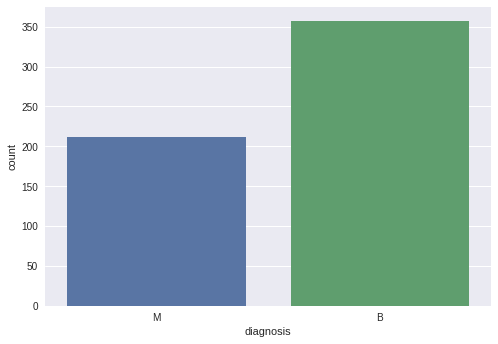

In [6]:
sns.countplot(x='diagnosis', data=df_banking)
plt.show()

In [7]:
df_banking.keys()

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [8]:
df_banking.groupby('symmetry_worst').mean()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,fractal_dimension_worst,Unnamed: 32
symmetry_worst,,,,,,,,,,,,,,,,,,,,,
0.1565,855133.0,14.99,25.20,95.54,698.8,0.09387,0.05131,0.02398,0.02899,0.1565,...,14.990,25.20,95.54,698.8,0.09387,0.05131,0.02398,0.02899,0.05504,NaN
0.1566,925311.0,11.20,29.37,70.67,386.0,0.07449,0.03558,0.00000,0.00000,0.1060,...,11.920,38.30,75.19,439.6,0.09267,0.05494,0.00000,0.00000,0.05905,NaN
0.1603,881094802.0,17.42,25.56,114.50,948.0,0.10060,0.11460,0.16820,0.06597,0.1308,...,18.070,28.07,120.40,1021.0,0.12430,0.17930,0.28030,0.10990,0.06818,NaN
0.1648,8810703.0,28.11,18.47,188.50,2499.0,0.11420,0.15160,0.32010,0.15950,0.1648,...,28.110,18.47,188.50,2499.0,0.11420,0.15160,0.32010,0.15950,0.05525,NaN
0.1652,864726.0,8.95,15.76,58.74,245.2,0.09462,0.12430,0.09263,0.02308,0.1305,...,9.414,17.07,63.34,270.0,0.11790,0.18790,0.15440,0.03846,0.07722,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0.5166,874858.0,14.22,23.12,94.37,609.9,0.10750,0.24130,0.19810,0.06618,0.2384,...,15.740,37.18,106.40,762.4,0.15330,0.93270,0.84880,0.17720,0.14460,NaN
0.5440,8610862.0,20.18,23.97,143.70,1245.0,0.12860,0.34540,0.37540,0.16040,0.2906,...,23.370,31.72,170.30,1623.0,0.16390,0.61640,0.76810,0.25080,0.09964,NaN
0.5558,895100.0,20.34,21.51,135.90,1264.0,0.11700,0.18750,0.25650,0.15040,0.2569,...,25.300,31.86,171.10,1938.0,0.15920,0.44920,0.53440,0.26850,0.10240,NaN


## Preprocess Data

#### Transform Categorical Data

In [9]:
# process categorical data
cat_vars = ['radius_mean', 'perimeter_mean', 'area_mean',
       'compactness_mean', 'concavity_mean', 'concave points_mean',
       'radius_se', 'perimeter_se', 'area_se', 'concave points_se',
       'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst',
       'smoothness_worst', 'compactness_worst', 'concavity_worst',
       'concave points_worst', 'symmetry_worst']
for var in cat_vars:
    cat_list ='var'+'_'+var
    cat_list = pd.get_dummies(df_banking[var], prefix=var)
    data1 = df_banking.join(cat_list)
    df_banking = data1

In [10]:
df_banking.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,symmetry_worst_0.4753,symmetry_worst_0.4761,symmetry_worst_0.4824,symmetry_worst_0.4863,symmetry_worst_0.4882,symmetry_worst_0.5166,symmetry_worst_0.544,symmetry_worst_0.5558,symmetry_worst_0.5774,symmetry_worst_0.6638
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,0,0,0,0,0,0,0,0,0,0
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,0,0,0,0,0,0,0,0,0,0
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,0,0,0,0,0,0,0,0,0,0
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,0,0,0,0,0,0,0,0,0,1
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,0,0,0,0,0,0,0,0,0,0


In [19]:
df_banking = df_banking.drop(['Unnamed: 32'], axis = 1)
df_banking.columns.values

array(['id', 'diagnosis', 'radius_mean', ..., 'symmetry_worst_0.5558',
       'symmetry_worst_0.5774', 'symmetry_worst_0.6638'], dtype=object)

In [20]:
# remove categorical data
cat_vars = ['radius_mean', 'perimeter_mean', 'area_mean',
       'compactness_mean', 'concavity_mean', 'concave points_mean',
       'radius_se', 'perimeter_se', 'area_se', 'concave points_se',
       'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst',
       'smoothness_worst', 'compactness_worst', 'concavity_worst',
       'concave points_worst', 'symmetry_worst']
data_vars = df_banking.columns.values.tolist()
to_keep = [i for i in data_vars if i not in cat_vars]

In [21]:
df_banking2 = df_banking[to_keep]
df_banking2.columns.values

array(['id', 'diagnosis', 'texture_mean', ..., 'symmetry_worst_0.5558',
       'symmetry_worst_0.5774', 'symmetry_worst_0.6638'], dtype=object)

#### Prepare Features & Labels

In [22]:
data_vars = df_banking2.columns.values.tolist()
y = ['diagnosis']
X = [i for i in data_vars if i not in y]

#### Split Data

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
X_train, X_test, y_train, y_test = train_test_split(df_banking2[X], df_banking2[y], test_size=0.3, random_state=0)

## Model Data

In [25]:
from sklearn.ensemble import RandomForestClassifier

In [18]:
rf_clf = RandomForestClassifier()
rf_clf.fit(X_train, y_train)

ValueError: Input contains NaN, infinity or a value too large for dtype('float32').

## Test Model

In [ ]:
model_score = rf_clf.score(X_test, y_test)

In [ ]:
print('Model Accuracy:', model_score)

## Check Importance Score

In [ ]:
X_ = np.array(X)
importance_scores = rf_clf.feature_importances_
indices = np.argsort(importance_scores)

feature_importances = pd.Series(rf_clf.feature_importances_, index=X)
feature_importances.nlargest(20).plot(kind='barh')

---